In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the visualization
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

# Uncomment to see data head in a table. It's a ton of data so I leave it commented for time saving purposes
# print(covid_df.head())

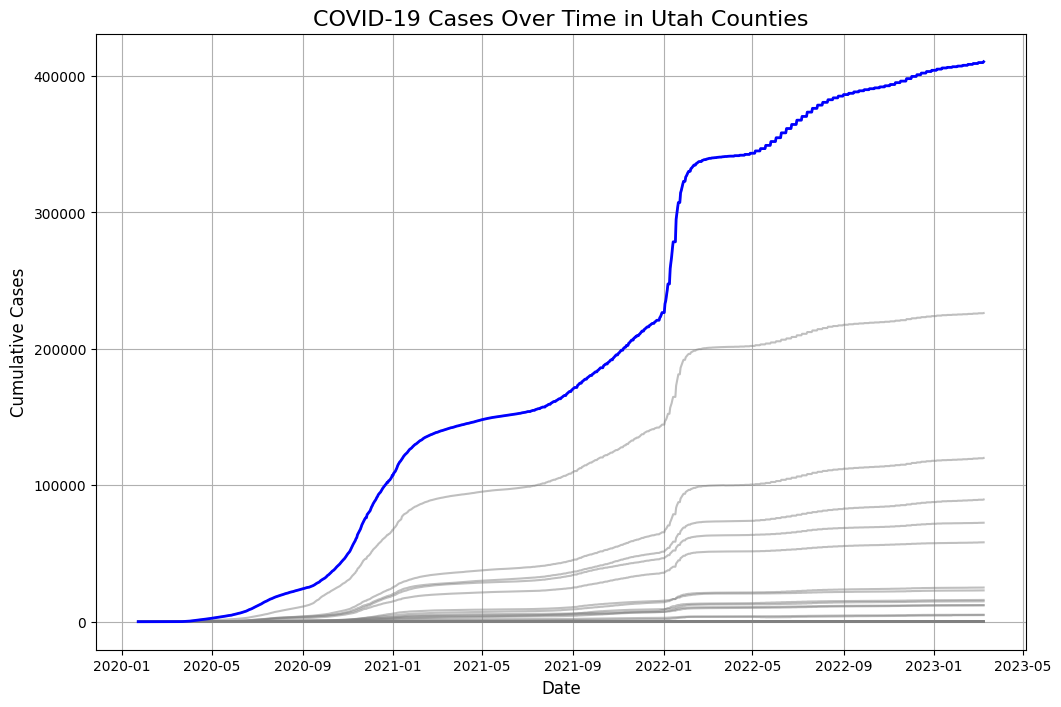

In [4]:
%matplotlib inline
'''
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should
-Show cases over time
-Have all counties plotted in a background color (something like grey)
-Have a single county plotted in a contrasting color (something not grey)
-Have well formatted dates as the X axis
'''
# Filter for Utah counties
utah_df = covid_df[covid_df['Province_State'] == 'Utah']

# Melt the date columns into rows
utah_df_melted = utah_df.melt(
    id_vars=['Admin2'],  # County names
    value_vars=utah_df.columns[11:],  # Date columns start at index 11
    var_name='Date', 
    value_name='Cases'
)
utah_df_melted['Date'] = pd.to_datetime(utah_df_melted['Date'], format='mixed')

# Plot each county initially as grey
plt.figure(figsize=(12, 8))
for county in utah_df_melted['Admin2'].unique():
    county_data = utah_df_melted[utah_df_melted['Admin2'] == county]
    plt.plot(county_data['Date'], county_data['Cases'], color='grey', alpha=0.5)

# Choose Salt lake to be highlighted as blue
highlight_county = 'Salt Lake'
highlight_data = utah_df_melted[utah_df_melted['Admin2'] == highlight_county]
plt.plot(highlight_data['Date'], highlight_data['Cases'], color='blue', label=highlight_county, linewidth=2)

# Add names to axes
plt.title('COVID-19 Cases Over Time in Utah Counties', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Cases', fontsize=12)
plt.grid(True)

plt.show()
plt.close('all')

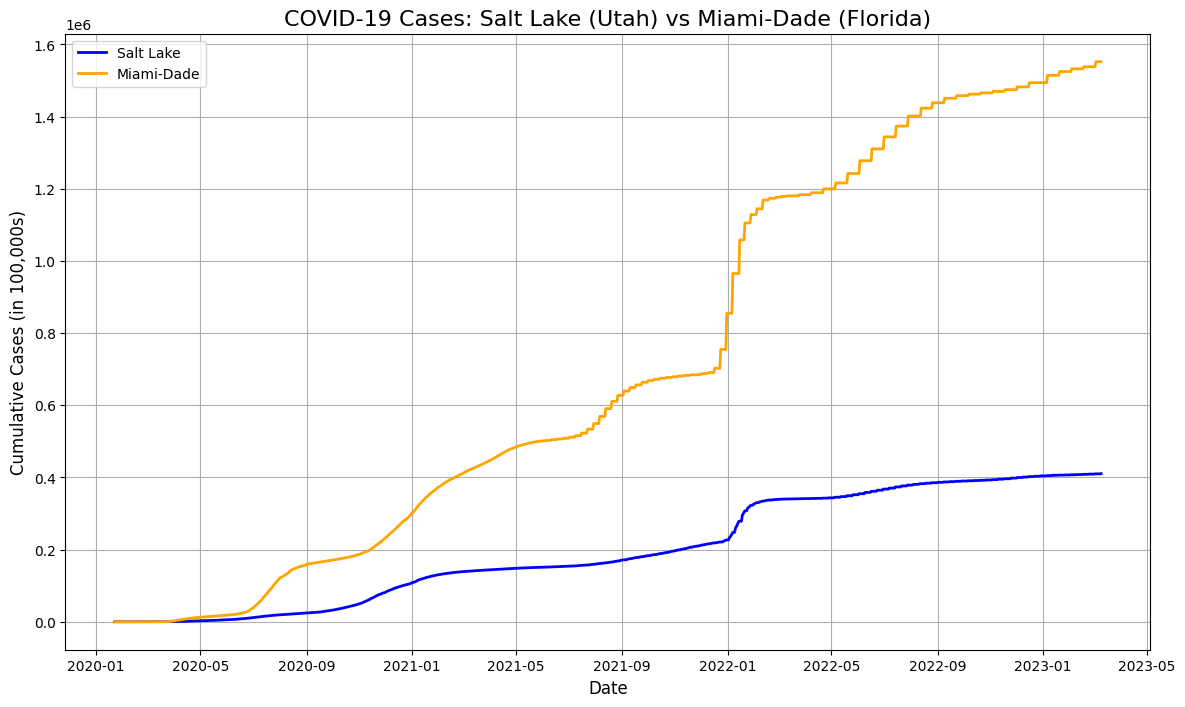

In [7]:
'''
Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:
-Have only two counties plotted
-Highlight the difference between the two comparison counties
You may use any style of graphic you like as long as it is effective (dense)
and readable
'''
# Extract Utah and Florida data to find counties with most cases
# I have the utah information above, but this code works with dynamically changing data
utah_df = covid_df[covid_df['Province_State'] == 'Utah']
florida_df = covid_df[covid_df['Province_State'] == 'Florida']

# Melt the date columns into rows
florida_df_melted = florida_df.melt(
    id_vars=['Admin2'],  # County names
    value_vars=utah_df.columns[11:],  # Date columns start at index 11
    var_name='Date', 
    value_name='Cases'
)
# Utah: Find county with the most cases
utah_max_cases_county = utah_df_melted.groupby('Admin2')['Cases'].max().idxmax()  # Get county name with the max cases
utah_max_cases_data = utah_df[utah_df['Admin2'] == utah_max_cases_county]

# Florida: Find county with the most cases
florida_max_cases_county = florida_df_melted.groupby('Admin2')['Cases'].max().idxmax()  # Get county name with the max cases
florida_max_cases_data = florida_df[florida_df['Admin2'] == florida_max_cases_county]

# Melt the date columns into rows for both counties
utah_max_cases_data_melted = utah_max_cases_data.melt(
    id_vars=['Admin2'],
    value_vars=utah_max_cases_data.columns[11:],  # Date columns start at index 11
    var_name='Date',
    value_name='Cases'
)

florida_max_cases_data_melted = florida_max_cases_data.melt(
    id_vars=['Admin2'],
    value_vars=florida_max_cases_data.columns[11:],  # Date columns start at index 11
    var_name='Date',
    value_name='Cases'
)

# Convert Date columns to datetime
utah_max_cases_data_melted['Date'] = pd.to_datetime(utah_max_cases_data_melted['Date'], format='mixed')
florida_max_cases_data_melted['Date'] = pd.to_datetime(florida_max_cases_data_melted['Date'], format='mixed')

# Sort data by date
utah_max_cases_data_melted = utah_max_cases_data_melted.sort_values('Date')
florida_max_cases_data_melted = florida_max_cases_data_melted.sort_values('Date')

# Plotting format
plt.figure(figsize=(14, 8))

# Plot the two counties
plt.plot(utah_max_cases_data_melted['Date'], utah_max_cases_data_melted['Cases'], color='blue', label=utah_max_cases_county, linewidth=2)
plt.plot(florida_max_cases_data_melted['Date'], florida_max_cases_data_melted['Cases'], color='orange', label=florida_max_cases_county, linewidth=2)

#Customize graph
plt.title(f"COVID-19 Cases: {utah_max_cases_county} (Utah) vs {florida_max_cases_county} (Florida)", fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Cases (in 100,000s)', fontsize=12)

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()
plt.close('all')

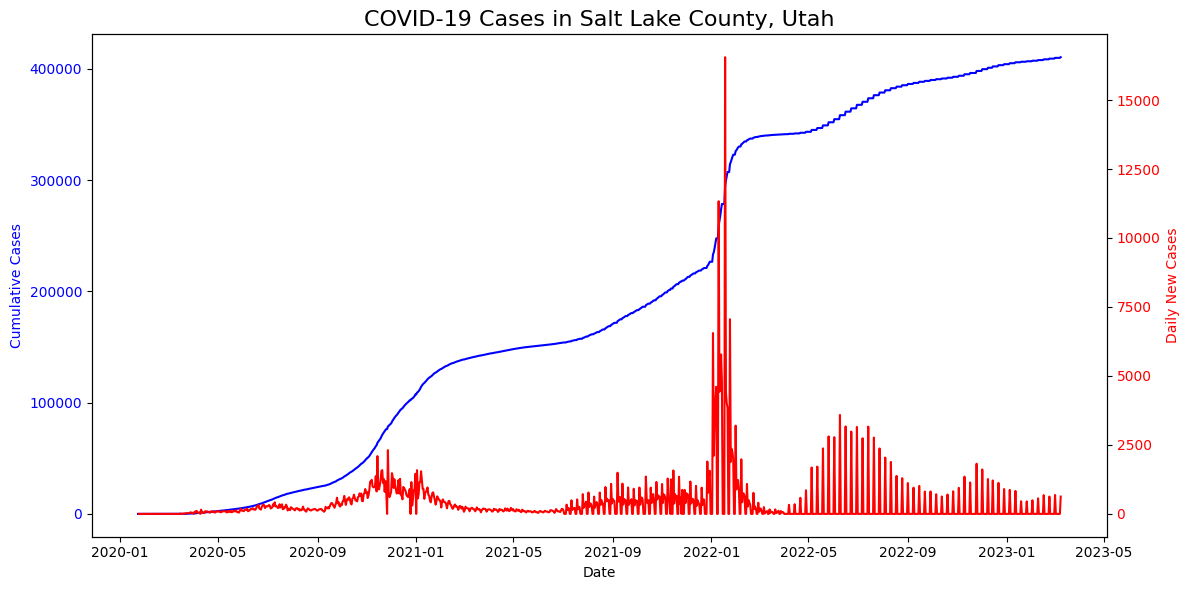

In [8]:
'''
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:
-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
-Use color to contrast the two series being plotted
-Have well formatted dates as the X axis
'''

# Pick any county
county_name = 'Salt Lake'
county_df = covid_df[(covid_df['Province_State'] == 'Utah') & (covid_df['Admin2'] == county_name)]

# Melt the date columns into rows
county_melted = county_df.melt(
    id_vars=['Admin2'],
    value_vars=county_df.columns[11:],
    var_name='Date', 
    value_name='Cumulative_Cases'
)
county_melted['Date'] = pd.to_datetime(county_melted['Date'], format='mixed')

# Calculate daily new cases and add it to the melted df
county_melted['Daily_New_Cases'] = county_melted['Cumulative_Cases'].diff()

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot cumulative cases on the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Cases', color=color1)
ax1.plot(county_melted['Date'], county_melted['Cumulative_Cases'], color="blue")
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for daily new cases
ax2 = ax1.twinx()
ax2.set_ylabel('Daily New Cases', color=color2)
ax2.plot(county_melted['Date'], county_melted['Daily_New_Cases'], color="red")
ax2.tick_params(axis='y', labelcolor=color2)

# Set title
plt.title(f'COVID-19 Cases in {county_name} County, Utah', fontsize=16)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
plt.close('all')

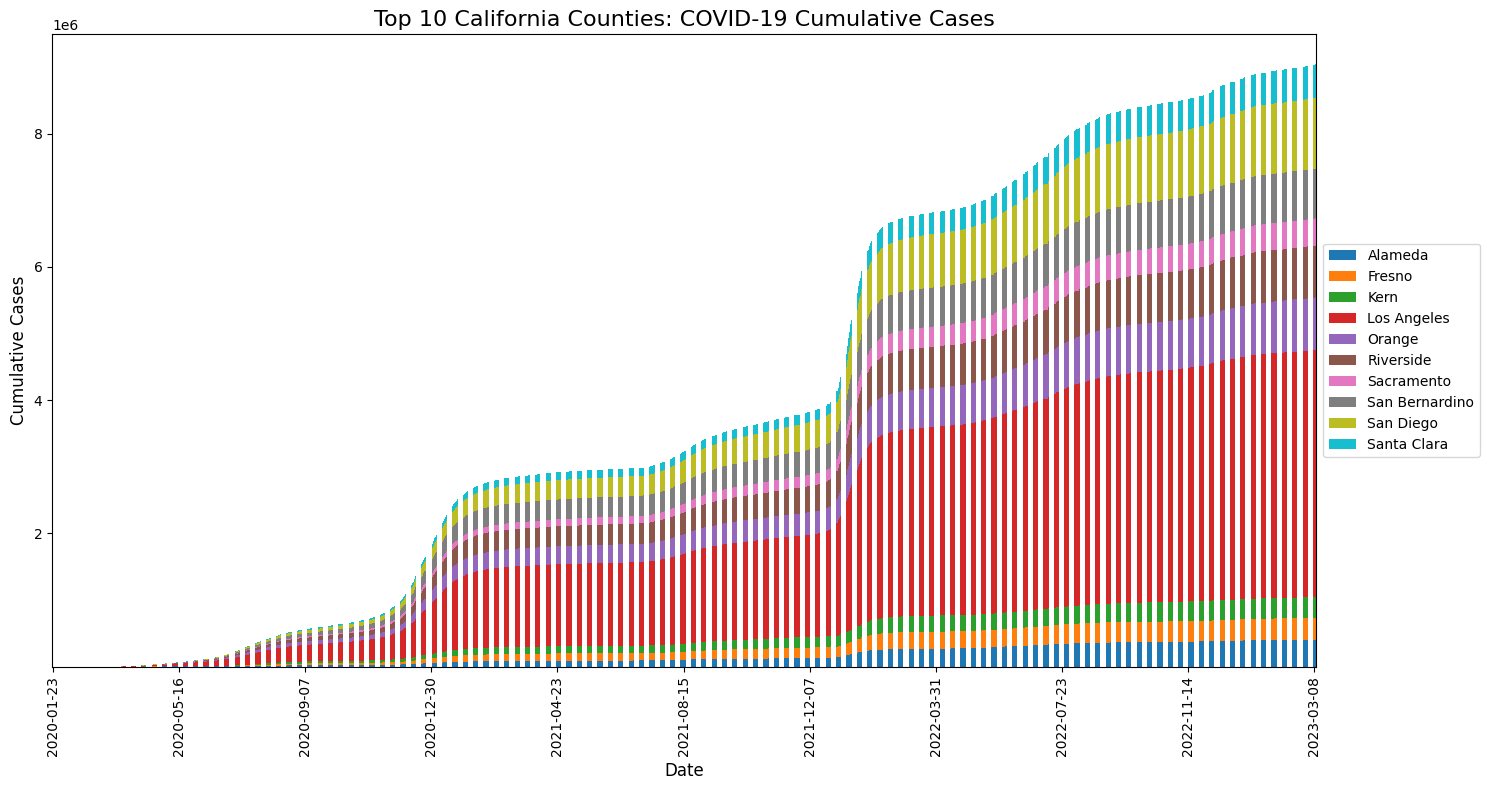

In [29]:
'''
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:
-Have a single column delineate a state
-Have each 'slice' or column compontent represent a county
'''

# Create df for the state specified
state = 'California'
state_df = covid_df[covid_df['Province_State'] == state]

# Group by max case count per date and sort
county_total_cases = state_df.groupby('Admin2')[state_df.columns[11:]].max().sum(axis=1)
county_total_cases_sorted = county_total_cases.sort_values(ascending=False)

# Choose the top 10 counties
top_counties = county_total_cases_sorted.head(10)
county_data_df = state_df[state_df['Admin2'].isin(top_counties.index)].set_index('Admin2')[state_df.columns[11:]]

# Construct plot
plt.figure(figsize=(15, 8))
county_data_df.T.plot(kind='bar', stacked=True, ax=plt.gca())

# Limit x axis to have 10 ticks
n = len(county_data_df.columns) // 10
date_indices = list(range(0, len(county_data_df.columns), n))
date_labels = pd.to_datetime(county_data_df.columns[::n], format='mixed')

# Format graph
plt.xticks(date_indices, date_labels.strftime('%Y-%m-%d'))
plt.title(f'Top 10 {state} Counties: COVID-19 Cumulative Cases', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Cases', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
plt.close('all')

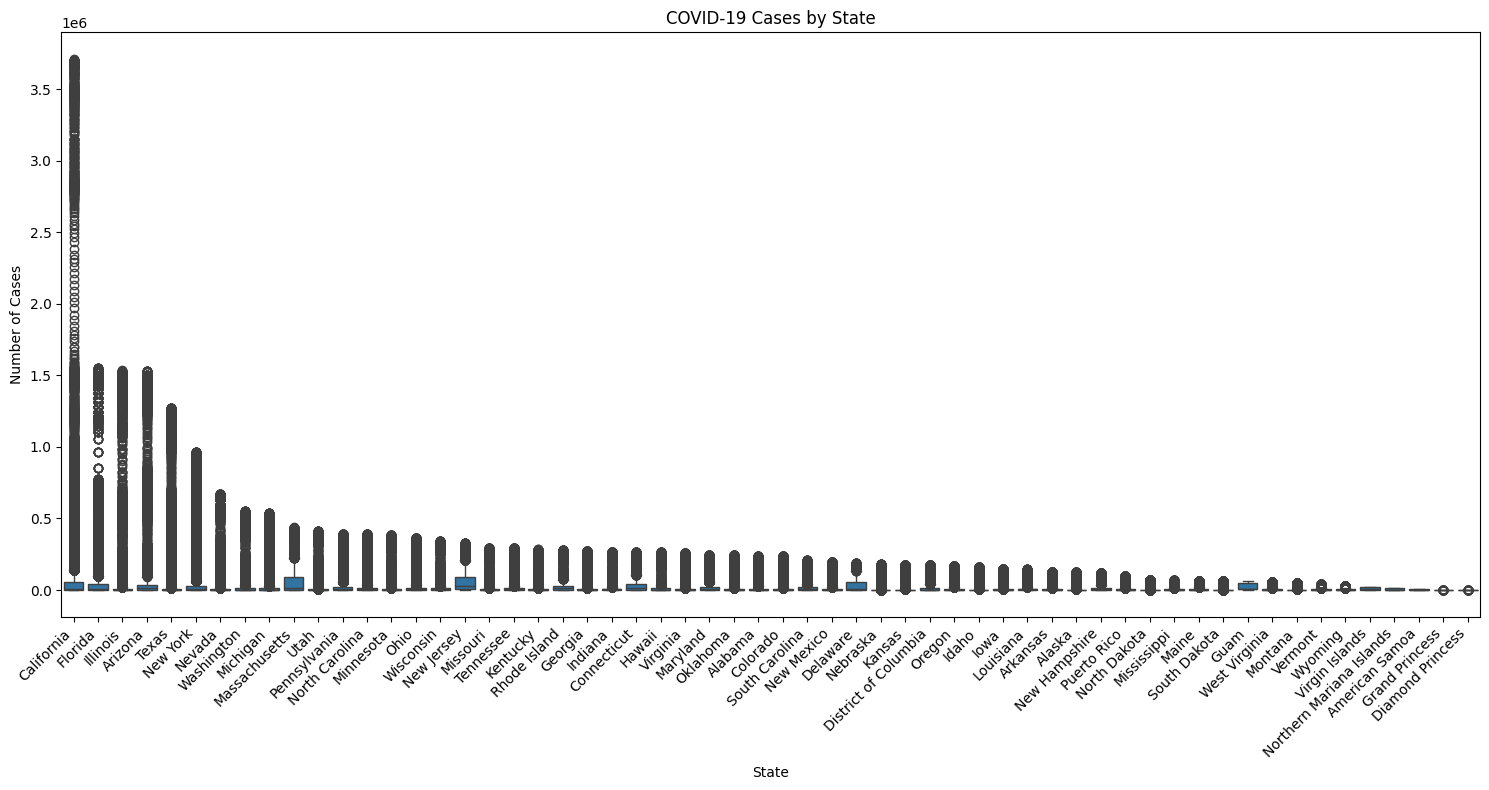

In [3]:
'''
Use Seaborn to create a grouped box plot of all reported states. Each boxplot
should be a distinct state. Have the states ordered from most cases (FL) to fewest 
cases. (https://seaborn.pydata.org/examples/grouped_boxplot.html)
'''
import seaborn as sb
# First, melt the dataframe to get cases in a single column
case_df = covid_df.melt(
    id_vars=['Province_State', 'Admin2'],  # Keep state and county
    value_vars=covid_df.columns[11:],      # Date columns
    var_name='Date',
    value_name='Cases'
)

# Calculate total cases per state
total_cases_by_state = case_df.groupby('Province_State')['Cases'].max().sort_values(ascending=False)

# Create the box plot
plt.figure(figsize=(15, 8))

# Use seaborn to graph the box plot
sb.boxplot(
    data=case_df,
    x='Province_State',
    y='Cases',
    order=total_cases_by_state.index  # Order states by total cases
)

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate state names
plt.title('COVID-19 Cases by State')
plt.xlabel('State')
plt.ylabel('Number of Cases')

# Adjust layout
plt.tight_layout()
plt.show()
plt.close('all')